Import Libraries

In [ ]:
!pip install category_encoders
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import statistics

from sklearn.model_selection import train_test_split

import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.svm import SVC # Support Vector Machines

# from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",10)

Data Collection

In [ ]:
df=pd.read_csv("predictive_maintenance.csv.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Data Exploration

1. Display a statistical description on our data

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


 2. Dislay all the information about our data: The number of columns and rows and the number of Non Null values for every column


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


3. Get the number of duplicated values (if exist)

In [ ]:
df.duplicated().sum()

0

Data Cleaning


1. Converting temperature in centigrate from Kelvin [1 K = -272.15 °C ]

In [ ]:
df = df.drop(["UDI","Product ID"],axis=1)

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"}, inplace=True)

2. Create 'Temperature difference' between 'Process temperature' and 'Air temperature'

In [ ]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
4214,L,29.75,38.45,1573,36.6,15,0,No Failure,8.7
9713,L,26.95,38.05,1496,45.0,104,0,No Failure,11.1
9328,H,26.35,36.95,2051,19.0,184,0,No Failure,10.6
5524,L,30.45,39.75,1633,30.9,89,0,No Failure,9.3
441,H,25.35,36.35,1393,46.6,56,0,No Failure,11.0


3. Display the count of the 'Type', 'Target' and 'Failure Type'

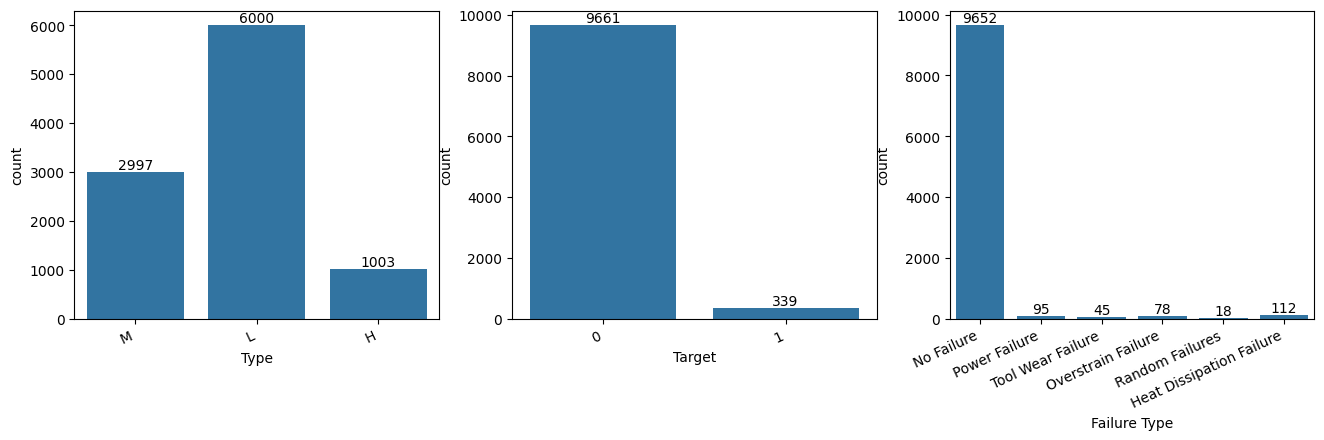

In [ ]:
ax = plt.figure(figsize=(16,4))

for idx, feature in enumerate(['Type','Target','Failure Type']):

    ax = plt.subplot(1, 3, 1+idx)
    ax = sns.countplot(x=feature, data=df)
    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=25, ha='right')

Remark:
Here I observed that the count number of 'No Failure' Type doesn't equal the count number of of the Target '0'

The best solution in this case I prefered to delete these lines because I didn't know what's the correct: is the target of 1 or the No failure type

In [ ]:
df_ = df[(df['Failure Type']=='No Failure') & (df['Target']==1)]
df_

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
1437,H,26.65,37.75,1439,45.2,40,1,No Failure,11.1
2749,M,27.55,37.05,1685,28.9,179,1,No Failure,9.5
4044,M,29.75,38.75,1419,47.7,20,1,No Failure,9.0
4684,M,31.45,39.65,1421,44.8,101,1,No Failure,8.2
5536,M,30.15,39.65,1363,54.0,119,1,No Failure,9.5
5941,L,28.45,38.55,1438,48.5,78,1,No Failure,10.1
6478,L,28.35,37.65,1663,29.1,145,1,No Failure,9.3
8506,L,26.25,37.45,1710,27.3,163,1,No Failure,11.2
9015,L,25.05,35.95,1431,49.7,210,1,No Failure,10.9


In [ ]:
merged_df = df.merge(df_, indicator=True, how='outer')
df = merged_df[merged_df['_merge'] == 'left_only'].drop('_merge', axis=1)

df.shape# display the new shape of our data

(9991, 9)

Verify of there is rows with 'Target' equal '0' (no Failure), and 'Failure Type' not equal a 'No Failure'

In [ ]:
df_ = df[((df['Failure Type'] !='No Failure')) & (df['Target']==0)]
df_

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
1221,M,24.85,36.15,1399,46.4,132,0,Random Failures,11.3
1302,L,26.45,37.65,1505,45.7,144,0,Random Failures,11.2
1748,H,26.25,35.55,1626,31.1,166,0,Random Failures,9.3
2072,L,27.45,37.35,1570,35.5,189,0,Random Failures,9.9
2559,L,27.15,36.85,1447,50.4,140,0,Random Failures,9.7
...,...,...,...,...,...,...,...,...,...
6091,L,28.75,38.55,1412,57.5,16,0,Random Failures,9.8
6913,L,28.65,39.05,1481,38.5,181,0,Random Failures,10.4
6960,L,28.55,38.85,1413,52.0,91,0,Random Failures,10.3
7488,L,28.15,39.55,1545,43.5,160,0,Random Failures,11.4


In [ ]:
merged_df = df.merge(df_, indicator=True, how='outer')
df = merged_df[merged_df['_merge'] == 'left_only'].drop('_merge', axis=1)

df.reset_index(drop=True, inplace=True)

df.shape

(9973, 9)

Verify now the count of the 'Type', 'Target' and 'Failure Type'

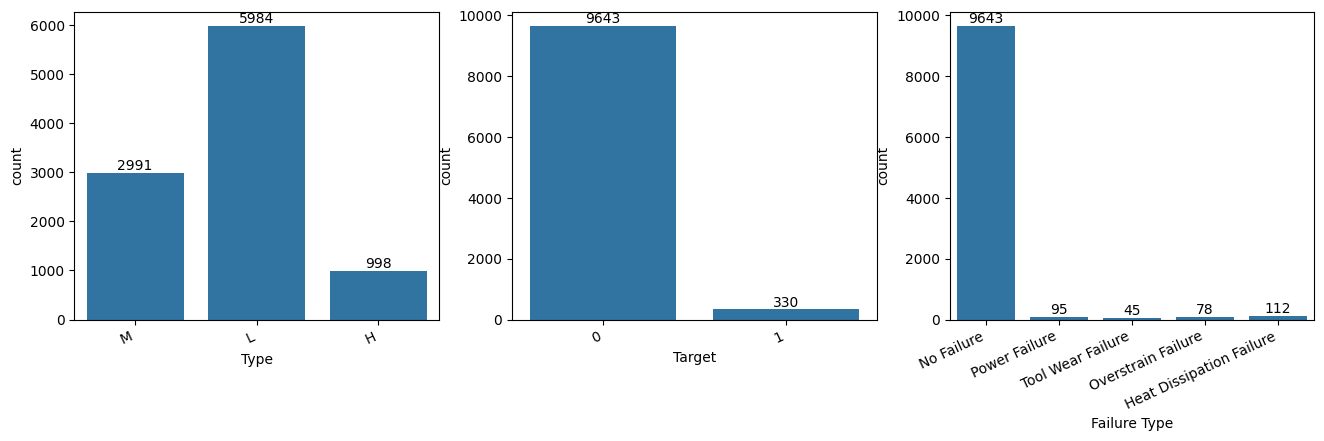

In [ ]:
ax = plt.figure(figsize=(16,4))

for idx, feature in enumerate(['Type', 'Target','Failure Type']):

    ax = plt.subplot(1, 3, 1+idx)
    ax = sns.countplot(x=feature, data=df)
    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=25, ha='right')

Data Visualisation

1. The temperature graphs

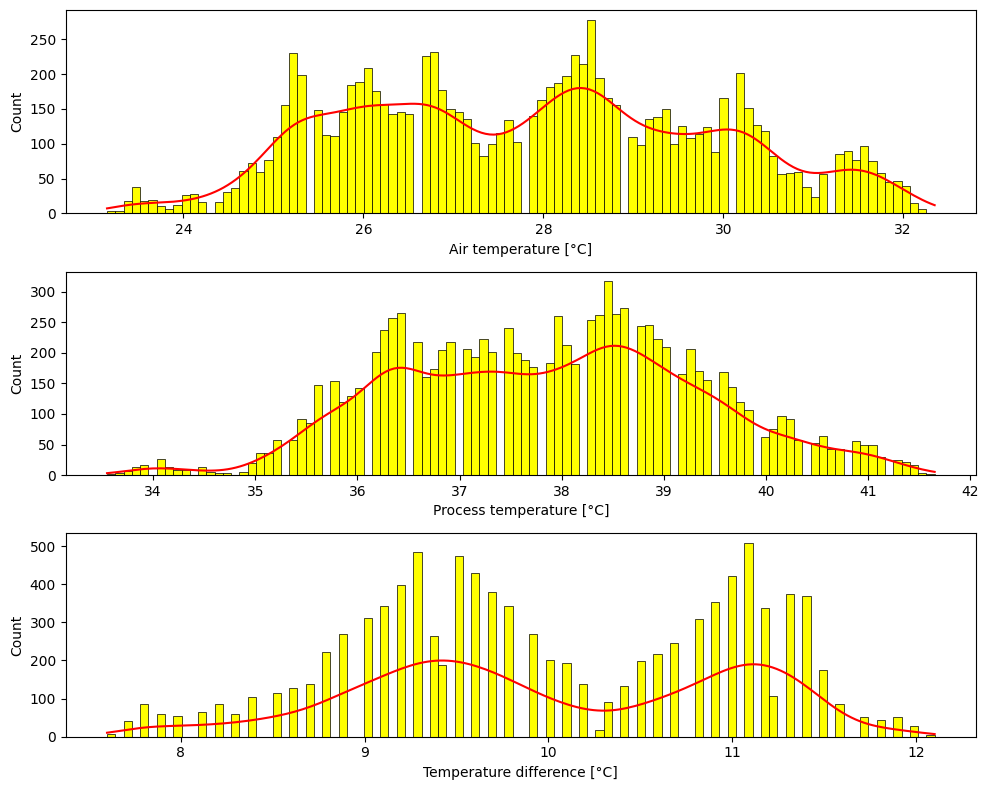

In [ ]:
figure, axes = plt.subplots(3, 1, figsize=(10, 8))

for idx, col in enumerate(["Air temperature [°C]", "Process temperature [°C]", "Temperature difference [°C]"]):
    sns.histplot(data=df, x=col, kde=True, bins = 100,color = "red", facecolor = "yellow", ax=axes[idx])

plt.tight_layout()
plt.show()

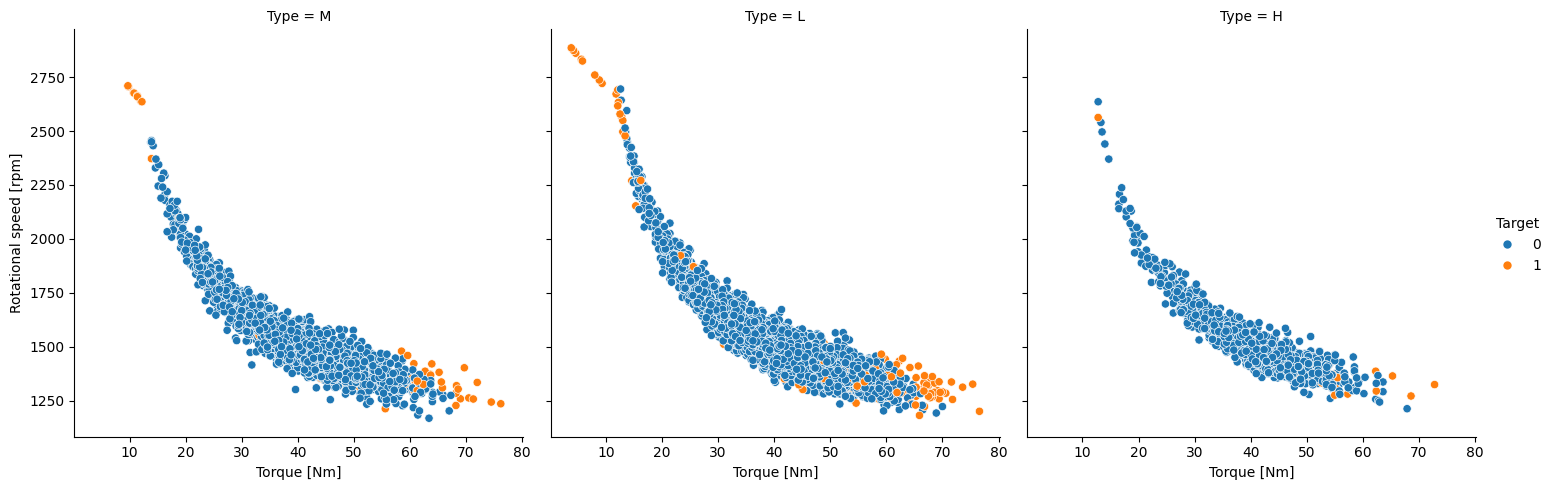

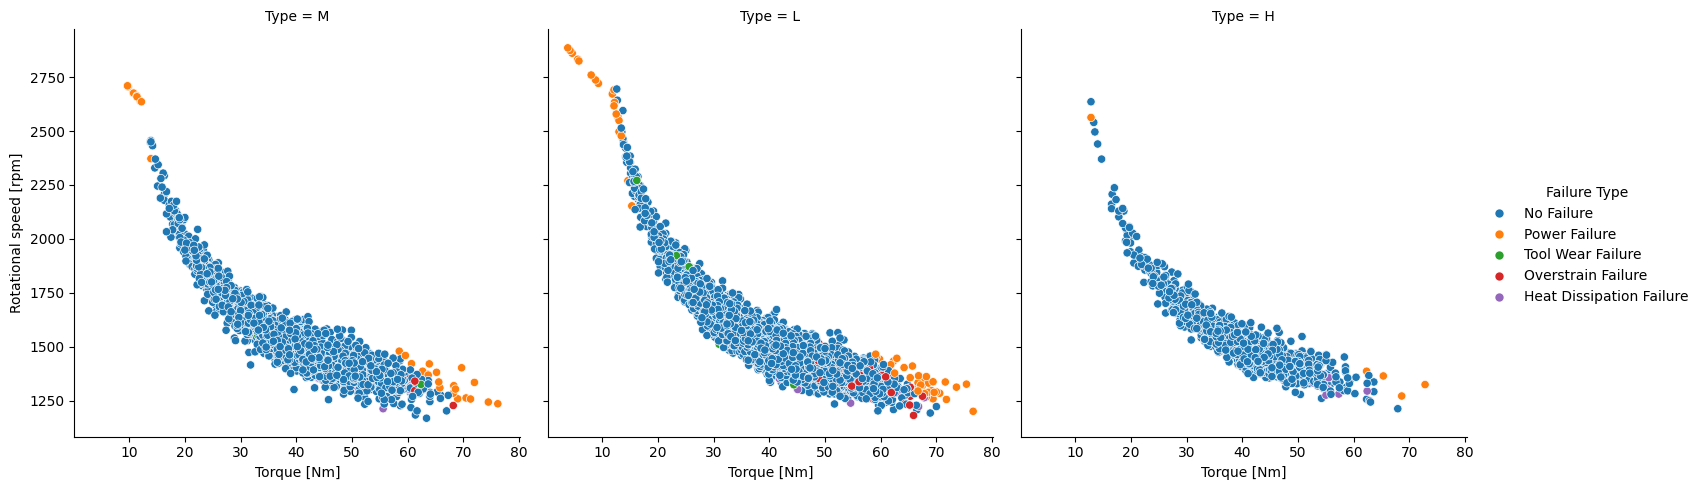

In [ ]:
for hue_param in ['Target', 'Failure Type']:
    sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue=hue_param, col="Type", palette='tab10')
    plt.show()

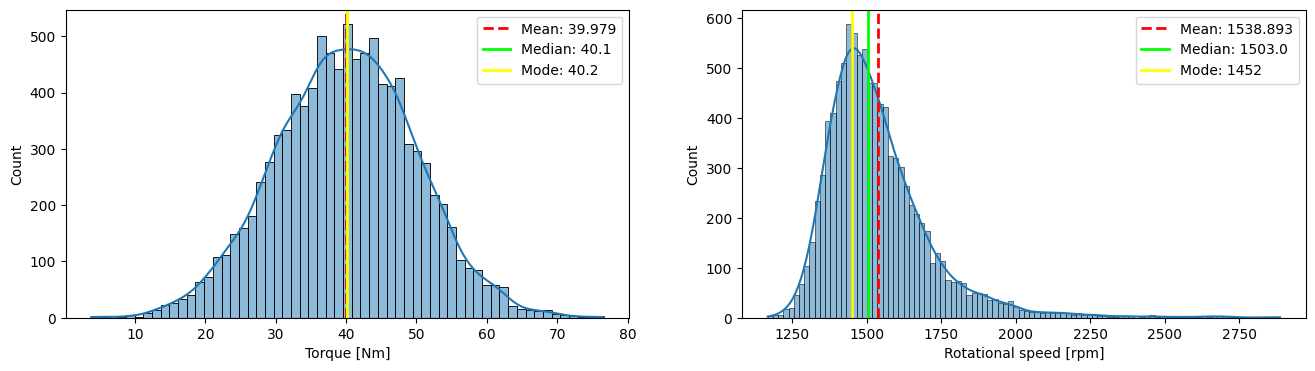

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

for idx, feature in enumerate(['Torque [Nm]', 'Rotational speed [rpm]']):
    sns.histplot(data = df[feature], kde = True, ax = ax[0+idx])

    ax[0+idx].axvline(x = df[feature].mean(), color = 'red', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0+idx].axvline(x = df[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0+idx].axvline(x = statistics.mode(df[feature]), color = 'yellow', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))

    ax[0+idx].legend()

plt.show()

In [ ]:
df.drop(columns=['Target'], inplace=True)

Feature Selection

1. Convert the categorical values to numerical values

In [ ]:
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)

scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

df['Failure Type'].value_counts()

,count
Failure Type,
0,9643
4,112
1,95
3,78
2,45


In [ ]:
# Calculate the number of "No Failure" instances you want to keep
desired_no_failure_count = 180  # Example: Keep 700 instances

# Separate "No Failure" instances from the rest
no_failure_df = df[df['Failure Type'] == 0]
failure_df = df[df['Failure Type'] != 0]

# Randomly sample the desired number of "No Failure" instances
sampled_no_failure_df = no_failure_df.sample(n=desired_no_failure_count, random_state=42)  # Use a random state for reproducibility

# Concatenate the sampled "No Failure" instances with the failure instances
balanced_df = pd.concat([sampled_no_failure_df, failure_df])

# Reset the index of the balanced DataFrame
balanced_df.reset_index(drop=True, inplace=True)

balanced_df.shape

(510, 8)

2. Visualise the correlation between the 'Failure Type' and The other columns

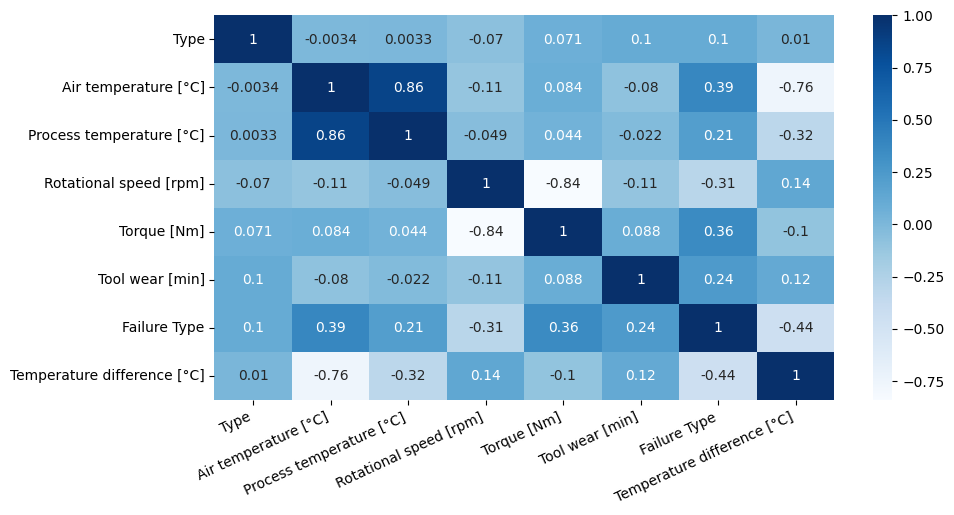

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(balanced_df.corr(), annot=True, cmap="Blues")
plt.xticks(rotation=25, ha="right")

plt.show()

3. Choose X and y

In [ ]:
X = balanced_df.drop(columns="Failure Type" , axis=1)
y = balanced_df["Failure Type"]
X.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temperature difference [°C]
0,1,28.35,39.15,1507,43.4,41,10.8
1,1,25.95,36.15,1453,41.5,204,10.2
2,1,28.25,37.75,1415,31.8,192,9.5
3,2,31.55,40.85,1753,29.0,42,9.3
4,2,25.45,36.25,1460,40.3,195,10.8


4. Split the data into train data and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=21)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((408, 7), (102, 7), (408,), (102,))

In [ ]:
print('The train classes:', y_train.value_counts())
print()
print('The test classes:', y_test.value_counts())

The train classes: Failure Type
0    144
4     90
1     76
3     62
2     36
Name: count, dtype: int64

The test classes: Failure Type
0    36
4    22
1    19
3    16
2     9
Name: count, dtype: int64


Modeling

1. Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Training Accuracy    : 70.34 %
Model Accuracy Score : 68.63 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.72      0.76        36
           1       0.50      0.74      0.60        19
           2       0.71      0.56      0.63         9
           3       0.63      0.75      0.69        16
           4       0.81      0.59      0.68        22

    accuracy                           0.69       102
   macro avg       0.69      0.67      0.67       102
weighted avg       0.72      0.69      0.69       102



2. Decision Tree Classifier

In [ ]:
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))

Training Accuracy    : 100.0 %
Model Accuracy Score : 92.16 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.84      0.84      0.84        19
           2       0.73      0.89      0.80         9
           3       0.94      0.94      0.94        16
           4       1.00      1.00      1.00        22

    accuracy                           0.92       102
   macro avg       0.90      0.92      0.90       102
weighted avg       0.93      0.92      0.92       102



3. Random Forest Classifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))

Training Accuracy    : 100.0 %
Model Accuracy Score : 87.25 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89        36
           1       0.89      0.84      0.86        19
           2       0.75      0.33      0.46         9
           3       0.79      0.94      0.86        16
           4       0.96      1.00      0.98        22

    accuracy                           0.87       102
   macro avg       0.85      0.81      0.81       102
weighted avg       0.87      0.87      0.86       102



4. SVM

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))

Training Accuracy    : 57.84 %
Model Accuracy Score : 54.9 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.71      0.81      0.75        36
           1       0.71      0.26      0.38        19
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        16
           4       0.41      1.00      0.58        22

    accuracy                           0.55       102
   macro avg       0.37      0.41      0.34       102
weighted avg       0.47      0.55      0.46       102



5. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# Train the model
gbm.fit(X_train, y_train)
# Evaluate the model
y_pred_gbm = gbm.predict(X_test)

gbm_train = round(gbm.score(X_train, y_train) * 100, 2)
gbm_accuracy = round(accuracy_score(y_pred_gbm, y_test) * 100, 2)

print("Training Accuracy    :",gbm_train ,"%")
print("Model Accuracy Score :",gbm_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred_gbm))


Training Accuracy    : 100.0 %
Model Accuracy Score : 92.16 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        36
           1       0.90      0.95      0.92        19
           2       0.83      0.56      0.67         9
           3       0.84      1.00      0.91        16
           4       1.00      1.00      1.00        22

    accuracy                           0.92       102
   macro avg       0.90      0.88      0.89       102
weighted avg       0.92      0.92      0.92       102



Model Choosing

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','Support Vector Machines', 'Decision Tree',
        'Random Forest','Gradient Boosting'
    ],

    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train,gbm_train],

    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy,gbm_accuracy
    ]
})

In [ ]:
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
2,Decision Tree,100.00,92.16
4,Gradient Boosting,100.00,92.16
3,Random Forest,100.00,87.25
0,Logistic Regression,70.34,68.63
1,Support Vector Machines,57.84,54.90


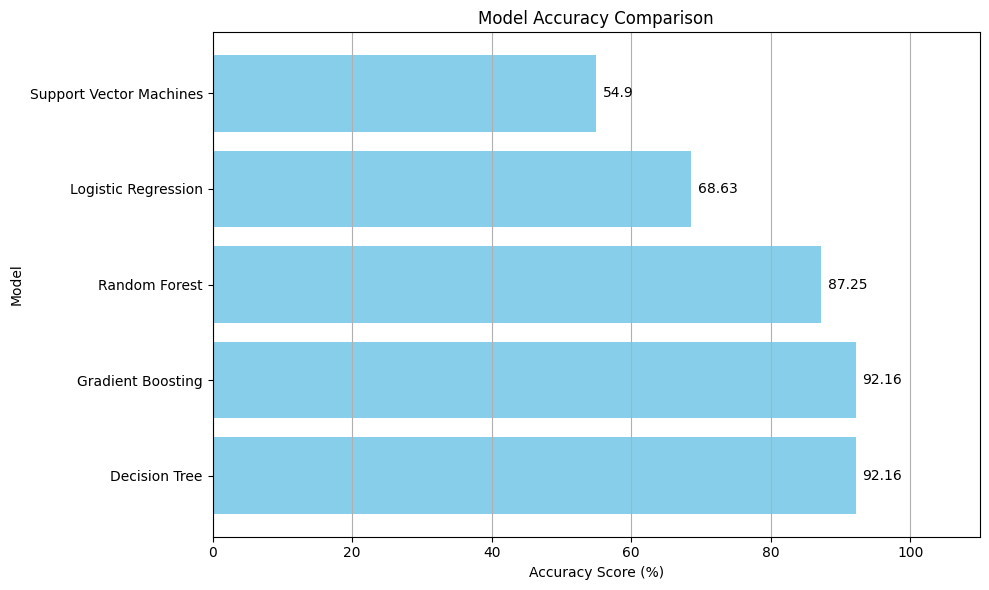

In [ ]:
# Sort the models DataFrame by accuracy
models_sorted = models.sort_values(by='Model Accuracy Score', ascending=False)

# Create the bar chart
# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(models_sorted['Model'], models_sorted['Model Accuracy Score'], color='skyblue')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')

# Annotate bars with accuracy values
for index, value in enumerate(models_sorted['Model Accuracy Score']):
    plt.text(value + 1, index, str(value), va='center')  # Adjust position as needed
plt.xlim(0, 110)  # Adjust as needed
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

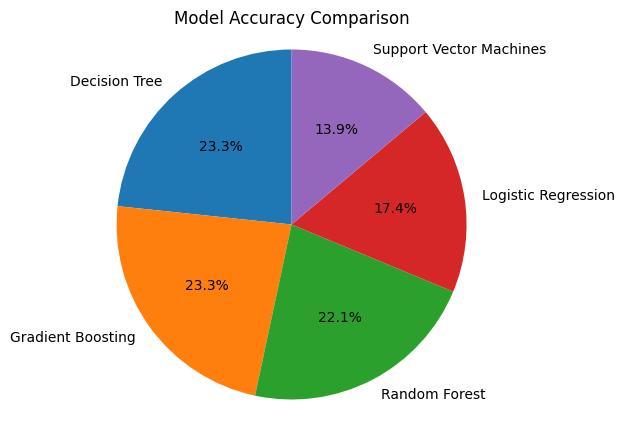

In [ ]:
# Create the pie chart
plt.figure(figsize=(6, 5))
plt.pie(models_sorted['Model Accuracy Score'], labels=models_sorted['Model'],
        autopct='%1.1f%%', startangle=90)
plt.title('Model Accuracy Comparison')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Model Evaluation

In [ ]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

[3 0 4 3 0 0 3 1 3 4 0 3 0 0 4 4 1 0 3 4 0 0 4 4 4 1 2 0 0 1 3 3 0 3 3 1 0
 2 1 3 0 1 3 4 4 0 1 1 1 4 2 3 3 0 0 0 4 0 0 4 0 0 0 4 0 0 0 1 4 4 4 4 3 4
 0 0 4 1 3 0 0 4 0 1 1 0 0 0 4 1 4 0 3 1 0 3 1 3 0 1 2 0]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(10)

,Actual,Predicted
287,4,4
491,2,2
401,4,4
268,4,4
374,4,4
98,0,0
216,3,3
15,0,0
223,3,3
490,3,3


Confusion Matrices

In [ ]:
# For Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:\n", cm_lr)

# For Decision Tree Classifier
cm_dec = confusion_matrix(y_test, y_pred_dec)
print("\nConfusion Matrix for Decision Tree Classifier:\n", cm_dec)

# For Gradient Boosting
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
print("\nConfusion Matrix for Gradient Boosting:\n", cm_gbm)

# For Random Forest Classifier
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix for Random Forest Classifier:\n", cm_rf)

# For SVM
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("\nConfusion Matrix for SVM:\n", cm_svc)

Confusion Matrix for Logistic Regression:
 [[26  8  1  0  1]
 [ 3 14  1  1  0]
 [ 2  0  5  2  0]
 [ 0  2  0 12  2]
 [ 1  4  0  4 13]]

Confusion Matrix for Decision Tree Classifier:
 [[33  2  1  0  0]
 [ 1 16  1  1  0]
 [ 0  1  8  0  0]
 [ 0  0  1 15  0]
 [ 0  0  0  0 22]]

Confusion Matrix for Gradient Boosting:
 [[33  1  1  1  0]
 [ 0 18  0  1  0]
 [ 2  1  5  1  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 22]]

Confusion Matrix for Random Forest Classifier:
 [[33  1  1  1  0]
 [ 1 16  0  1  1]
 [ 3  1  3  2  0]
 [ 1  0  0 15  0]
 [ 0  0  0  0 22]]

Confusion Matrix for SVM:
 [[29  1  0  0  6]
 [ 4  5  0  0 10]
 [ 6  1  0  0  2]
 [ 2  0  0  0 14]
 [ 0  0  0  0 22]]


Hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid to search over
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Use RandomizedSearchCV for efficient hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new Random Forest model with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)

# Fit the best model to the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the best model
best_rf_accuracy = round(accuracy_score(y_pred_best_rf, y_test) * 100, 2)
print("Best Model Accuracy Score:", best_rf_accuracy, "%")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Best Model Accuracy Score: 89.22 %


In [ ]:
best_rf_train = round(gbm.score(X_train, y_train) * 100, 2)
best_rf_accuracy = round(accuracy_score(y_test, y_pred_best_rf) * 100, 2)

print("Training Accuracy    :",best_rf_train ,"%")
print("Model Accuracy Score :",best_rf_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred_best_rf))

Training Accuracy    : 100.0 %
Model Accuracy Score : 89.22 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.89      0.89      0.89        19
           2       0.80      0.44      0.57         9
           3       0.79      0.94      0.86        16
           4       1.00      1.00      1.00        22

    accuracy                           0.89       102
   macro avg       0.88      0.84      0.85       102
weighted avg       0.89      0.89      0.89       102



In [ ]:
print('Hypertuned Random Forest Classifier')
print(confusion_matrix(y_test, y_pred_best_rf))

Hypertuned Random Forest Classifier
[[33  1  1  1  0]
 [ 1 17  0  1  0]
 [ 2  1  4  2  0]
 [ 1  0  0 15  0]
 [ 0  0  0  0 22]]


Saving The Model

In [ ]:
import joblib

# Assuming 'best_rf' is your chosen Random Forest model
# Replace with 'decision_tree_pruned' if you prefer the Decision Tree
model_filename = 'model.pkl'
joblib.dump(best_rf, model_filename)

['model.pkl']

Creating API

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the saved model
model = joblib.load('predictive_maintenance_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get input data as JSON
    # Preprocess data as needed (e.g., feature scaling)
    prediction = model.predict([data])  # Make prediction
    return jsonify({'prediction': prediction.tolist()})  # Return prediction as JSON

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
